<a href="https://colab.research.google.com/github/abir-mahamud/Covid-19/blob/master/Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("de de pal tule de majhi hela koris na chere de nouka ami jabo madina na na jeler bhetor ma ke ar thakete debo naaaaaa :D ha ha ")

de de pal tule de majhi hela koris na chere de nouka ami jabo madina na na jeler bhetor ma ke ar thakete debo naaaaaa :D ha ha 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go

#This cell's code is required when you are working with plotly on colab
plotly.io.renderers.default = 'colab'

#Cufflinks is a third-party wrapper library around Plotly, maintained by. 
#When you import cufflinks, all Pandas data frames and series objects have a new method attached to them called .
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import folium
import seaborn as sns

In [ ]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
df = pd.read_excel(r'/Covid cases in India.xlsx')

In [ ]:
df

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,12,0,1,0
1,2,Chhattisgarh,6,0,0,0
2,3,Delhi,38,1,6,1
3,4,Gujarat,43,0,0,3
4,5,Haryana,16,14,11,0
5,6,Himachal Pradesh,4,0,0,1
6,7,Karnataka,20,0,3,2
7,8,Kerala,131,7,11,0
8,9,Madhya Pradesh,23,0,0,1
9,10,Maharashtra,144,3,15,4


In [ ]:
df['Total Cases'] = df['Total Confirmed cases (Indian National)']+df['Total Confirmed cases ( Foreign National )']
df

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases
0,1,Andhra Pradesh,12,0,1,0,12
1,2,Chhattisgarh,6,0,0,0,6
2,3,Delhi,38,1,6,1,39
3,4,Gujarat,43,0,0,3,43
4,5,Haryana,16,14,11,0,30
5,6,Himachal Pradesh,4,0,0,1,4
6,7,Karnataka,20,0,3,2,20
7,8,Kerala,131,7,11,0,138
8,9,Madhya Pradesh,23,0,0,1,23
9,10,Maharashtra,144,3,15,4,147


In [ ]:
total_cases = df['Total Cases'].sum()
total_cases

729

In [ ]:
df.style.background_gradient(cmap='Reds')

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases
0,1,Andhra Pradesh,12,0,1,0,12
1,2,Chhattisgarh,6,0,0,0,6
2,3,Delhi,38,1,6,1,39
3,4,Gujarat,43,0,0,3,43
4,5,Haryana,16,14,11,0,30
5,6,Himachal Pradesh,4,0,0,1,4
6,7,Karnataka,20,0,3,2,20
7,8,Kerala,131,7,11,0,138
8,9,Madhya Pradesh,23,0,0,1,23
9,10,Maharashtra,144,3,15,4,147


In [ ]:
Total_active_cases = df.groupby('Name of State / UT')['Total Cases'].sum().sort_values(ascending=False).to_frame()
Total_active_cases.style.background_gradient(cmap='Reds')

,Total Cases
Name of State / UT,
Maharashtra,147
Kerala,138
Telengana,45
Uttar Pradesh,43
Rajasthan,43
Gujarat,43
Delhi,39
Tamil Nadu,35
Haryana,30


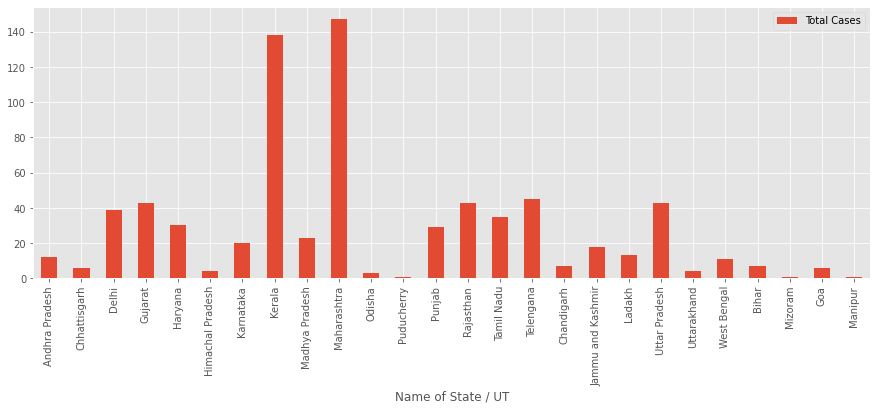

In [ ]:
#Pandas vis
df.plot(kind='bar',x='Name of State / UT',y='Total Cases')
plt.rcParams['figure.figsize']=15, 5
plt.show()
#Plotly
plotly.io.renderers.default = 'colab'
df.iplot(kind='bar',x='Name of State / UT',y='Total Cases')

<BarContainer object of 26 artists>

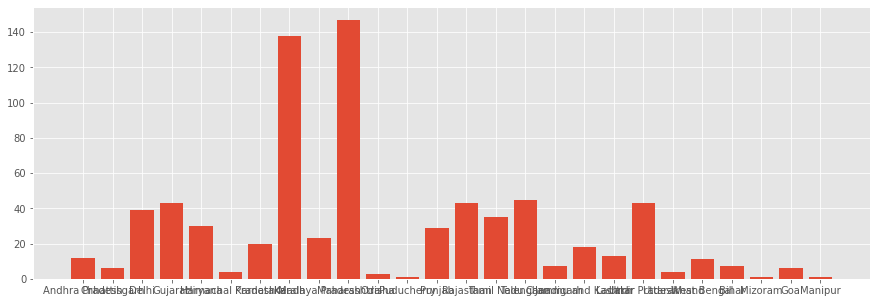

In [ ]:
#Matplotlib vis
plt.bar(df['Name of State / UT'],df['Total Cases'])

In [ ]:
px.bar(df, x='Name of State / UT',y='Total Cases')

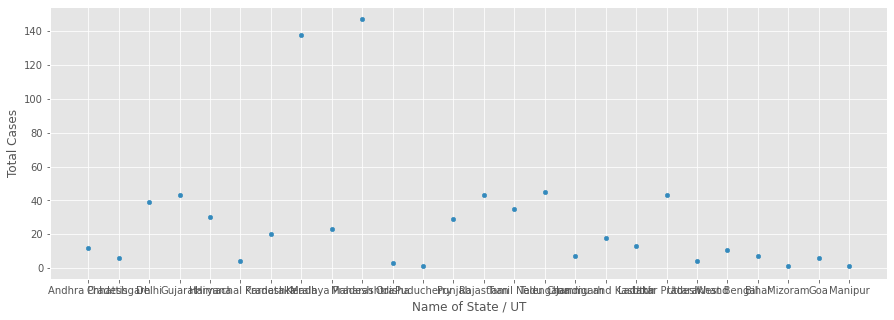

In [ ]:
df.plot(kind='scatter',x='Name of State / UT',y='Total Cases')

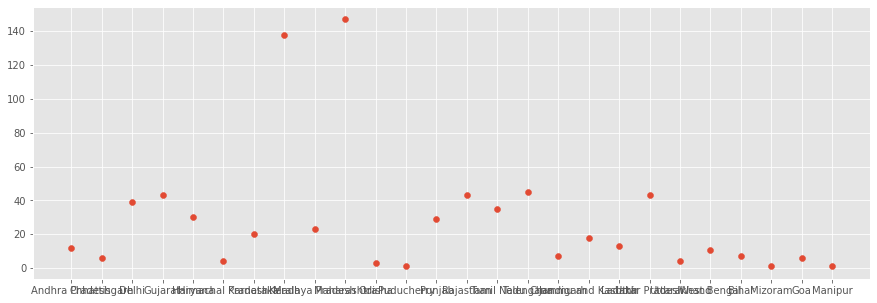

In [ ]:
plt.scatter(df['Name of State / UT'], df['Total Cases'])

In [ ]:
df.iplot(kind='scatter', x='Name of State / UT', y='Total Cases', mode='markers + lines', title='My Graph')

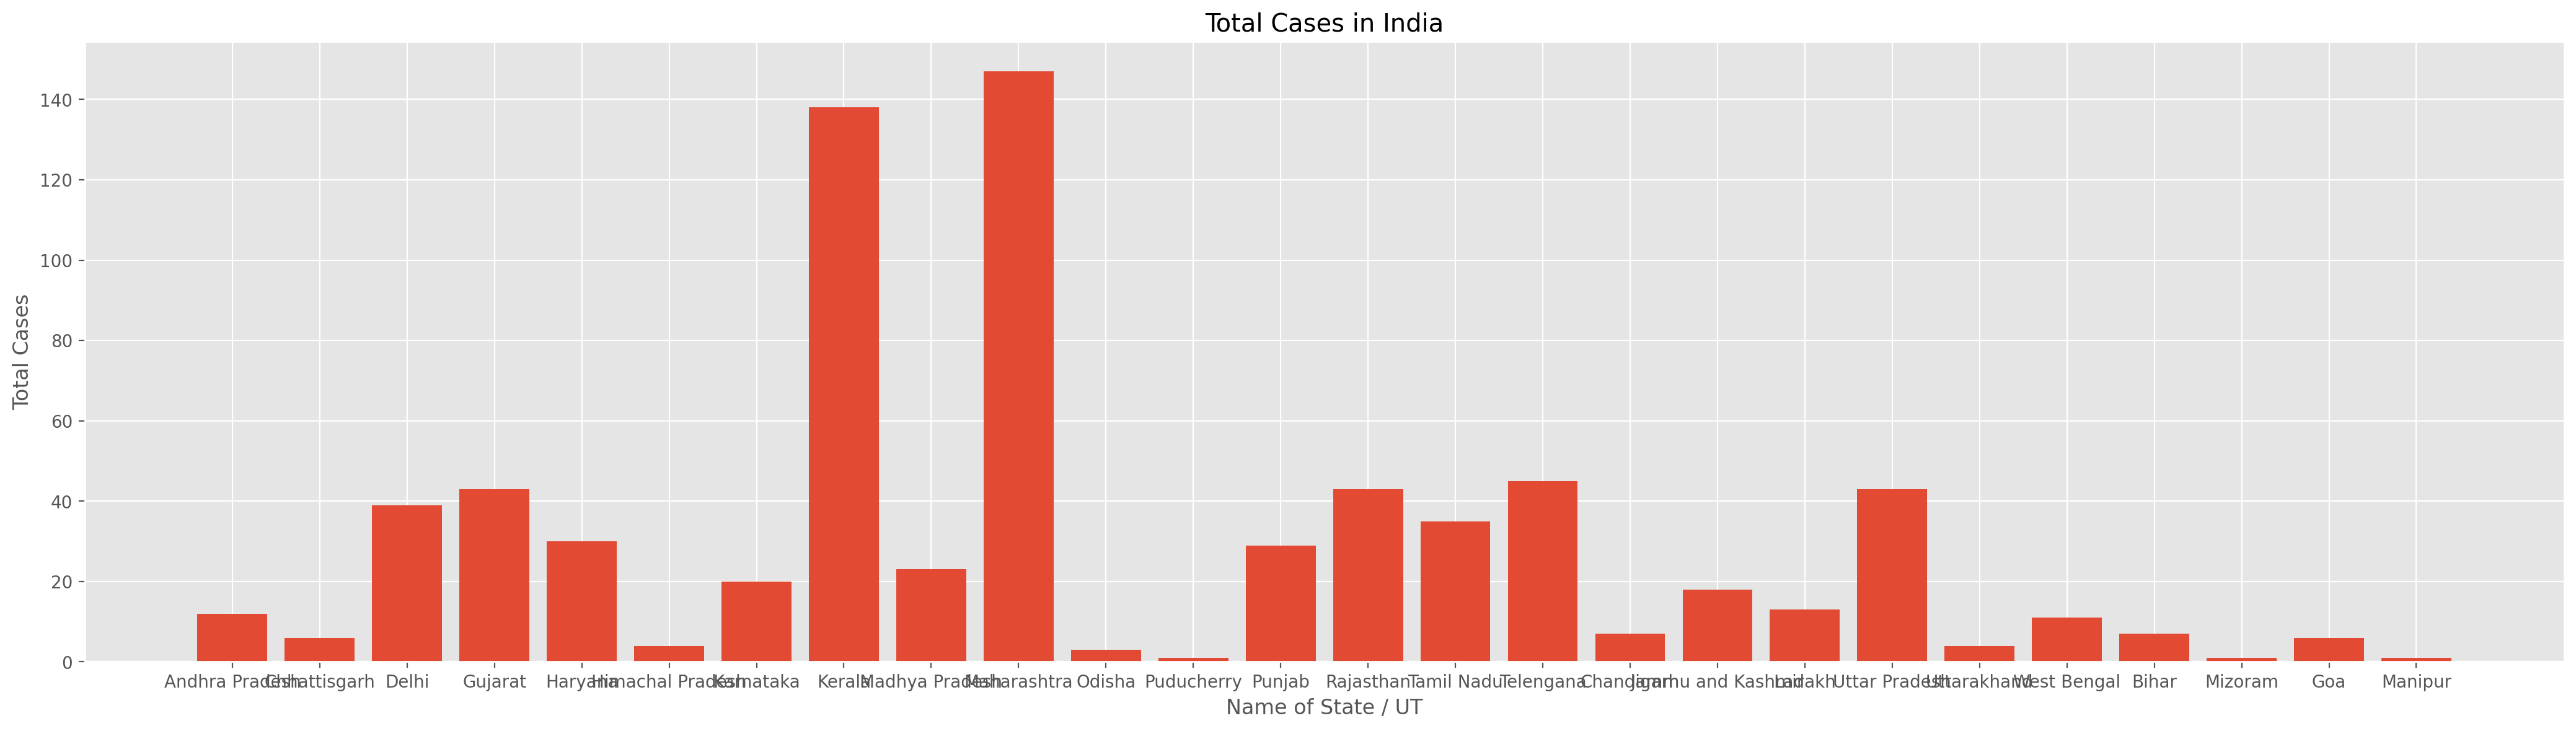

In [ ]:
#Object oriented visualization
#Matplotlib
fig=plt.figure(figsize=(20,5),dpi=200)
axes=fig.add_axes([0,0,1,1])
axes.bar(df['Name of State / UT'],df['Total Cases'])
axes.set_title("Total Cases in India")
axes.set_xlabel("Name of State / UT")
axes.set_ylabel("Total Cases")
plt.show()

#plotly
plotly.io.renderers.default = 'colab'

fig=go.Figure()
fig.add_trace(go.Bar(x=df['Name of State / UT'], y=['Total Cases']))
fig.update_layout(title='Total Cases in India', xaxis=dict(title='Total Cases in India'), yaxis=dict(title='Total Cases'))

In [ ]:
India_coord=pd.read_excel(r'/Indian Coordinates.xlsx')
India_coord

,Name of State / UT,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973
5,Chandigarh,30.719997,76.780006
6,Chhattisgarh,22.090420,82.159987
7,Dadra And Nagar Haveli,20.266578,73.016618
8,Delhi,28.669993,77.230004
9,Goa,15.491997,73.818001


In [ ]:
# Learn how to use folium to create a zoomable map
df_full = pd.merge(India_coord,df,on='Name of State / UT')
map = folium.Map(location=[20, 70], zoom_start=4,tiles='Stamenterrain')

for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Total Cases'], df_full['Name of State / UT']):
    folium.CircleMarker([lat, lon], radius=value*0.8, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map

In [ ]:
#Day by day data of India, Korea, Italy and Wuhan
dbd_Bangladesh = pd.read_excel(r'/per_day_cases.xlsx',parse_dates=True, sheet_name="Bangladesh")
dbd_India = pd.read_excel(r'/per_day_cases.xlsx',parse_dates=True, sheet_name='India')
dbd_Italy = pd.read_excel(r'/per_day_cases.xlsx',parse_dates=True, sheet_name="Italy")
dbd_Korea = pd.read_excel(r'/per_day_cases.xlsx',parse_dates=True, sheet_name="Korea")
dbd_Wuhan = pd.read_excel(r'/per_day_cases.xlsx',parse_dates=True, sheet_name="Wuhan")
dbd_Bangladesh

,Date,Total Cases,New Cases,Days after surpassing 100 cases,Total Death,New Death,Active Cases
0,2020-03-16,8,3,NaN,1,1,5
1,2020-03-17,10,2,NaN,1,0,7
2,2020-03-18,14,4,NaN,1,0,10
3,2020-03-19,18,4,NaN,1,0,14
4,2020-03-20,20,2,NaN,1,0,16
5,2020-03-21,24,4,NaN,2,1,19
6,2020-03-22,27,3,NaN,2,0,22
7,2020-03-23,33,6,NaN,3,1,25
8,2020-03-24,39,6,NaN,4,1,30
9,2020-03-25,39,0,NaN,5,1,27


In [ ]:
dbd_Bangladesh['Recovered'] = dbd_Bangladesh['Total Cases'] - (dbd_Bangladesh['Active Cases'] + dbd_Bangladesh['Total Death'])
dbd_Bangladesh

,Date,Total Cases,New Cases,Days after surpassing 100 cases,Total Death,New Death,Active Cases,Recovered
0,2020-03-16,8,3,NaN,1,1,5,2
1,2020-03-17,10,2,NaN,1,0,7,2
2,2020-03-18,14,4,NaN,1,0,10,3
3,2020-03-19,18,4,NaN,1,0,14,3
4,2020-03-20,20,2,NaN,1,0,16,3
5,2020-03-21,24,4,NaN,2,1,19,3
6,2020-03-22,27,3,NaN,2,0,22,3
7,2020-03-23,33,6,NaN,3,1,25,5
8,2020-03-24,39,6,NaN,4,1,30,5
9,2020-03-25,39,0,NaN,5,1,27,7


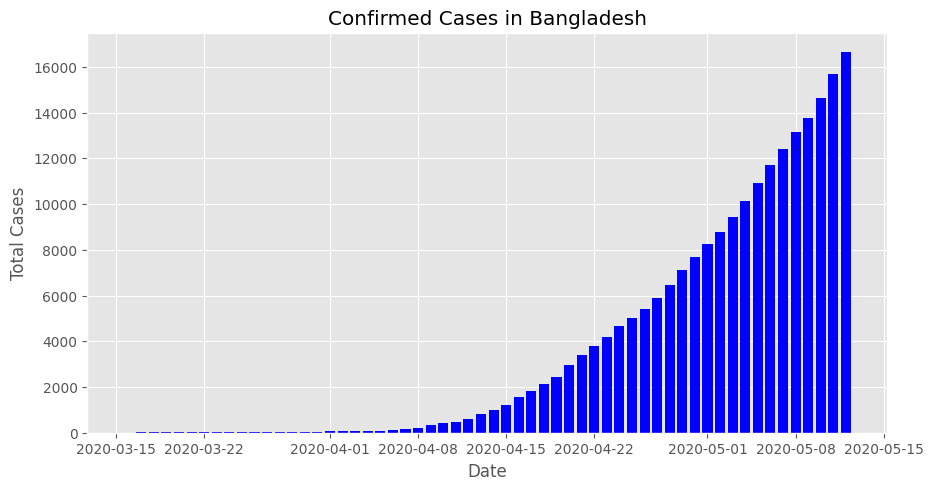

In [ ]:
fig=plt.figure(figsize=(10,5), dpi=100)
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.bar(dbd_Bangladesh['Date'], dbd_Bangladesh['Total Cases'], color='blue')
axes.set_xlabel('Date')
axes.set_ylabel('Total Cases')
axes.set_title('Confirmed Cases in Bangladesh')
plt.show()

plotly.io.renderers.default = 'colab'

fig=px.bar(dbd_Bangladesh, x='Date', y='Total Cases', color='Total Cases', title='Confirmed cases in Bangladesh')
fig.show()

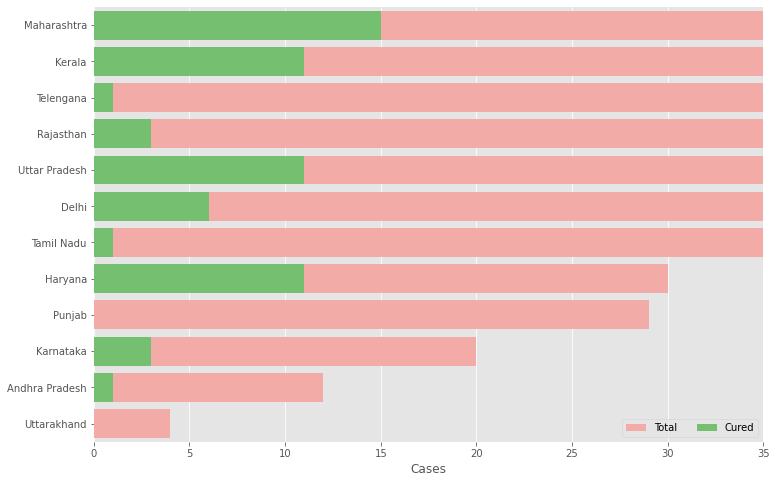

In [ ]:
#Learn how to use Seaborn for visualization
f, ax = plt.subplots(figsize=(12, 8))
data = df_full[['Name of State / UT','Total Cases','Cured','Death']]
data.sort_values('Total Cases',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Total Cases", y="Name of State / UT", data=data,label="Total", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Cured", y="Name of State / UT", data=data, label="Cured", color="g")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 35), ylabel="",xlabel="Cases")
sns.despine(left=True, bottom=True)

In [ ]:
#This cell's code is required when you are working with plotly on colab
import plotly
plotly.io.renderers.default = 'colab'

In [ ]:
#Learn how to create interactive graphs using plotly
# import plotly.graph_objects as go
# Rise of COVID-19 cases in Bangladesh
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_Bangladesh['Date'], y = dbd_Bangladesh['Total Cases'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in Bangladesh (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

# New COVID-19 cases reported daily in Bangladesh

import plotly.express as px
fig = px.bar(dbd_Bangladesh, x="Date", y="New Cases", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in Bangladesh on daily basis',plot_bgcolor='rgb(230, 230, 230)')

fig.show()

In [ ]:
# import plotly.express as px
fig = px.bar(dbd_India, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in India', color_discrete_sequence = px.colors.cyclical.IceFire)

#Colour Scale for plotly 
''' https://plot.ly/python/builtin-colorscales/ '''

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(dbd_Italy, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Italy', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(dbd_Korea, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in South Korea', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()
fig = px.bar(dbd_Wuhan, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Wuhan', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(dbd_Bangladesh, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Bangladesh', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [ ]:
#Learn how to create subplots using plotly
# import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=("Italy", "India", "Bangladesh", "Wuhan"))

fig.add_trace(go.Bar(x=dbd_Italy['Date'], y=dbd_Italy['Total Cases'],
                    marker=dict(color=dbd_Italy['Total Cases'], coloraxis="coloraxis")),1, 1)

fig.add_trace(go.Bar(x=dbd_India['Date'], y=dbd_India['Total Cases'],
                    marker=dict(color=dbd_India['Total Cases'], coloraxis="coloraxis")),1, 2)

fig.add_trace(go.Bar(x=dbd_Bangladesh['Date'], y=dbd_Bangladesh['Total Cases'],
                    marker=dict(color=dbd_Bangladesh['Total Cases'], coloraxis="coloraxis")),2, 1)

# fig.add_trace(go.Bar(x=dbd_Wuhan['Date'], y=dbd_Wuhan['Total Cases'],
#                     marker=dict(color=dbd_Wuhan['Total Cases'], coloraxis="coloraxis")),2, 2)

# fig.add_trace(go.Bar(x=dbd_Korea['Date'], y=dbd_Korea['Total Cases'],
#                    marker=dict(color=dbd_Korea['Total Cases'], coloraxis="coloraxis")),1, 1)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False,title_text="Total Confirmed cases(Cumulative)")

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [ ]:
# import plotly.graph_objects as go

title = 'Main Source for News'
labels = ['Bangladesh', 'Italy', 'India']
colors = ['rgb(122,128,0)', 'rgb(255,0,0)', 'rgb(49,130,189)']

mode_size = [10, 10, 12]
line_size = [1, 3, 5]

fig = go.Figure()


fig.add_trace(go.Scatter(x=dbd_Bangladesh['Days after surpassing 100 cases'], 
                 y=dbd_Bangladesh['Total Cases'],mode='lines',
                 name=labels[0],
                 line=dict(color=colors[0], width=line_size[0]),            
                 connectgaps=True))
fig.add_trace(go.Scatter(x=dbd_Italy['Days after surpassing 100 cases'], 
                 y=dbd_Italy['Total Cases'],mode='lines',
                 name=labels[1],
                 line=dict(color=colors[1], width=line_size[1]),            
                 connectgaps=True))

fig.add_trace(go.Scatter(x=dbd_India['Days after surpassing 100 cases'], 
                 y=dbd_India['Total Cases'],mode='lines',
                 name=labels[2],
                 line=dict(color=colors[2], width=line_size[2]),            
                 connectgaps=True))
    
    
    
annotations = []

annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Days after crossing 100 cases ',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))

fig.update_layout(annotations=annotations,plot_bgcolor='white',yaxis_title='Cumulative cases')

fig.show()

In [ ]:
df = pd.read_csv('/covid_19_clean_complete.csv',parse_dates=['Date'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

df_confirmed = pd.read_csv("/time_series_covid19_confirmed_global.csv")
df_recovered = pd.read_csv("/time_series_covid19_recovered_global.csv")
df_deaths = pd.read_csv("/time_series_covid19_deaths_global.csv")

df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)

In [ ]:
df_deaths.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.head()

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0


In [ ]:
df2 = df.groupby(["Date", "Country", "Province/State"])[['Date', 'Province/State', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
df2.head()

,Date,Country,Province/State,Confirmed,Deaths,Recovered
0,2020-01-22,Australia,Australian Capital Territory,0.0,0.0,0.0
1,2020-01-22,Australia,From Diamond Princess,0.0,0.0,0.0
2,2020-01-22,Australia,New South Wales,0.0,0.0,0.0
3,2020-01-22,Australia,Northern Territory,0.0,0.0,0.0
4,2020-01-22,Australia,Queensland,0.0,0.0,0.0


In [ ]:
# Check for India's data
df.query('Country=="Bangladesh"').groupby("Date")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0
...,...,...,...,...
57,2020-03-19,17.0,1.0,3.0
58,2020-03-20,20.0,1.0,3.0
59,2020-03-21,25.0,2.0,3.0
60,2020-03-22,27.0,2.0,3.0


In [ ]:
#Overall worldwide Confirmed/ Deaths/ Recovered cases 
df.groupby('Date').sum().head()

,Lat,Long,Confirmed,Deaths,Recovered
Date,,,,,
2020-01-22,7777.4793,1639.7021,554.0,17.0,28.0
2020-01-23,7777.4793,1639.7021,652.0,18.0,30.0
2020-01-24,7777.4793,1639.7021,939.0,26.0,36.0
2020-01-25,7777.4793,1639.7021,1432.0,42.0,39.0
2020-01-26,7777.4793,1639.7021,2113.0,56.0,52.0


In [ ]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [ ]:
fig = go.Figure()
#Plotting datewise confirmed cases
fig.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths['Date'], y=deaths['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='Worldwide NCOVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))

fig.show()

In [ ]:
from fbprophet import Prophet

In [ ]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [ ]:
confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [ ]:
confirmed.tail()

,ds,y
57,2020-03-19,242708.0
58,2020-03-20,272166.0
59,2020-03-21,304524.0
60,2020-03-22,335955.0
61,2020-03-23,336004.0


In [ ]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [ ]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,355136.872975,334552.680968,374492.950412
65,2020-03-27,372235.326938,352339.496451,392766.700315
66,2020-03-28,388674.964143,367877.720483,410325.520353
67,2020-03-29,405307.954675,382532.339459,427401.283271
68,2020-03-30,418529.648466,394988.531042,441702.325539


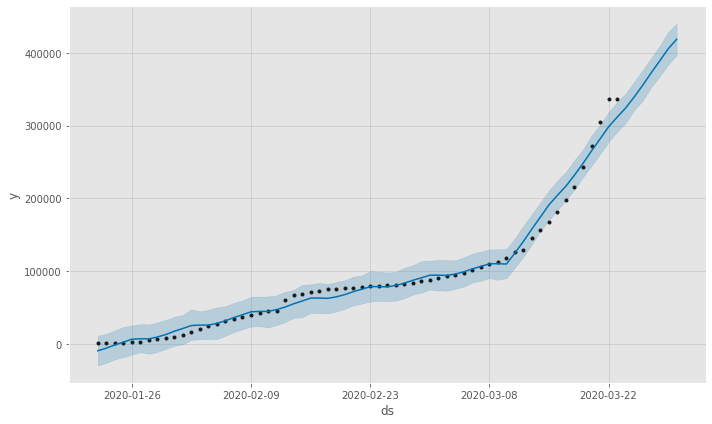

In [ ]:
confirmed_forecast_plot = m.plot(forecast)

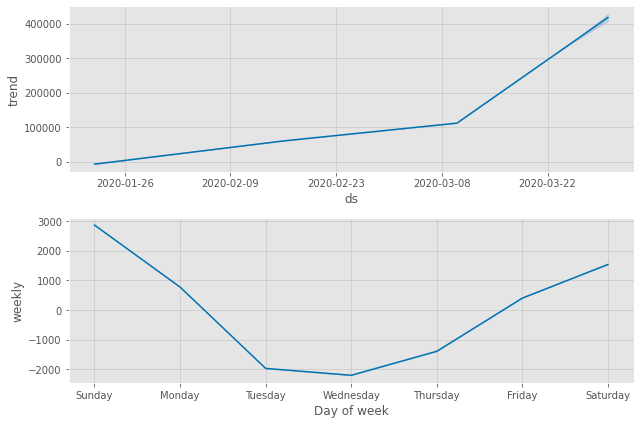

In [ ]:
confirmed_forecast_plot =m.plot_components(forecast)

In [ ]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [ ]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=7)
future.tail()


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,15411.877522,14479.203128,16331.835942
65,2020-03-27,16199.617603,15282.634759,17105.902718
66,2020-03-28,17006.904589,16037.507264,18043.861684
67,2020-03-29,17831.505383,16864.732438,18962.420472
68,2020-03-30,18490.986176,17430.196110,19514.138317


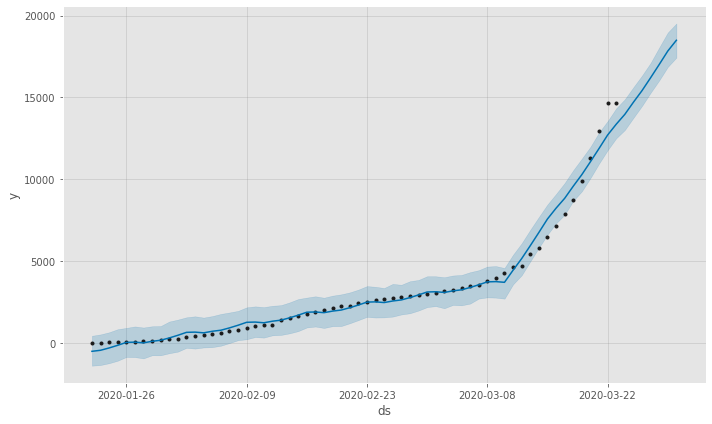

In [ ]:
deaths_forecast_plot = m.plot(forecast)

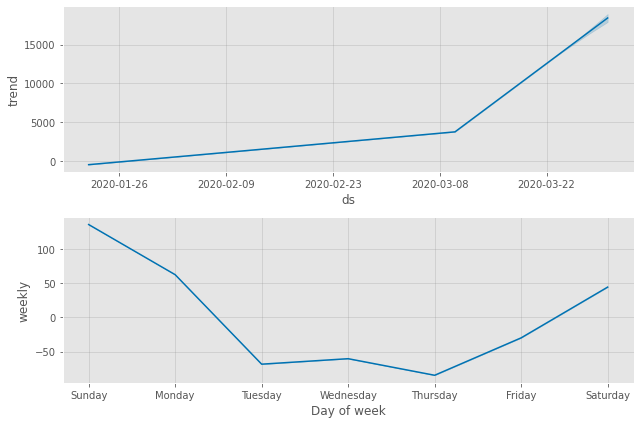

In [ ]:
deaths_forecast_plot = m.plot_components(forecast)

In [ ]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [ ]:
m = Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,103001.351662,101384.506234,104658.333673
65,2020-03-27,105338.025042,103532.998705,107298.733595
66,2020-03-28,108256.310813,106177.269817,110507.171678
67,2020-03-29,111119.296170,108601.562044,113715.729082
68,2020-03-30,113244.961749,110426.444192,116023.020550


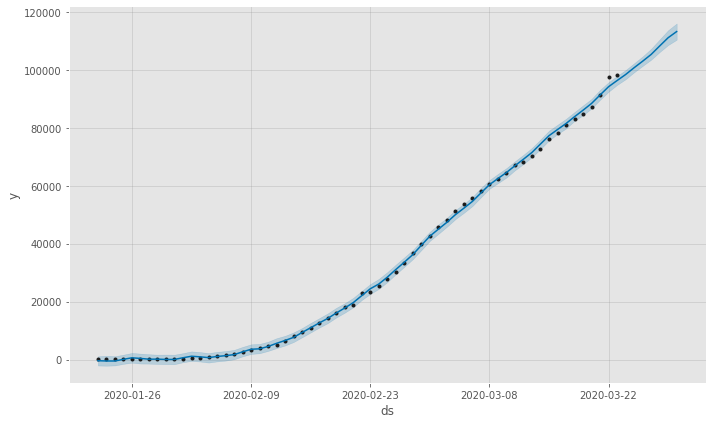

In [ ]:
recovered_forecast_plot = m.plot(forecast)

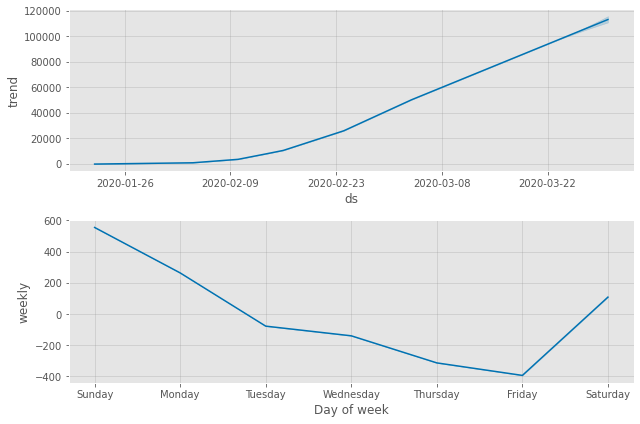

In [ ]:
recovered_forecast_plot = m.plot_components(forecast)